# Overview

I plot the univariate maps from SPM 
`scripts/step04_SPM/6cond_highlowcue_rampupplateau/s05_6condramp_stimlinear_dummy.mlx`

In [1]:
# load brain data
# plot subcortical in canlab atlas
# plot parcel in glasser
# plot in MNI
import os
from os.path import join
from neuromaps.parcellate import Parcellater
from matplotlib.colors import LinearSegmentedColormap, to_rgba
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nilearn import plotting
from neuromaps.datasets import fetch_fslr

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


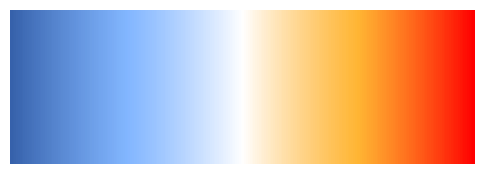

In [40]:
# Define the colors at specific points
colors = [
    (-2, "#120041"),  # Start with blue at -1.9
    (-1.5, "#2500fa"),
    (-1, "#84c6fd"),  # Start with blue at -1.9
    (0, "white"),    # Transition to white at 0
    (1, "#d50044"),
    (1.5, "#ff0000"),    # Start transitioning to red just after 0 towards 1.2
    (2, "#ffd400")  # End with yellow at 1.2
]

colors_with_opacity = [
    (-2, to_rgba("#3661ab", alpha=1.0)),  # Fully opaque
    (-1.5, to_rgba("#63a4ff", alpha=0.8)),  # Fully opaque
    # (-0.1, to_rgba("#008bff", alpha=0.6)),  # Fully opaque
    (0, to_rgba("white", alpha=1.0)),       # Fully opaque
    # (0.1, to_rgba("#d50044", alpha=0.6)),   # 30% opacity
    (1.5, to_rgba("#ffa300", alpha=0.8)),   # 60% opacity
    (2, to_rgba("#ff0000", alpha=1.0))    # Fully opaque
]



# Normalize the points to the [0, 1] interval
norm_points = np.linspace(-2, 2, len(colors_with_opacity))
norm_colors = [c[1] for c in colors_with_opacity]
norm_points = (norm_points - norm_points.min()) / (norm_points.max() - norm_points.min())

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_gradient", list(zip(norm_points, norm_colors)))

# Create a gradient image
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()

plt.show()

In [3]:
from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
import glob

def plot_brain_surfaces(image, cbar_label='INSERT LABEL', cmap='viridis', color_range=None):
    """
    Plot brain surfaces with the given data.

    Parameters:
    - TST: Tuple of (left hemisphere data, right hemisphere data) to be plotted.
    - cbar_label: Label for the color bar.
    - cmap: Colormap for the data.
    - color_range: Optional. Tuple of (min, max) values for the color range. If not provided, the range is auto-detected.
    """
    surfaces_fslr = fetch_fslr()
    lh_fslr, rh_fslr = surfaces_fslr['inflated']
    
    p = Plot(surf_lh=lh_fslr,
             surf_rh=rh_fslr, 
             size=(5000, 1000), 
             zoom=1.2, layout='row', 
             views=['lateral', 'medial', 'ventral', 'posterior'], 
             mirror_views=True, brightness=.7)
    p.add_layer({'left': image[0], 
            'right': image[1]}, 
            cmap=cmap, cbar=True,
            color_range=color_range,
            cbar_label=cbar_label
            ) # YlOrRd_r

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
    fig = p.build(cbar_kws=cbar_kws)
    return(fig)
    # fig.show()

# Example usage:
# TST = (left_hemisphere_data, right_hemisphere_data)
# plot_brain_surfaces(TST, cbar_label='gradient', cmap='viridis', color_range=(0, .15))


In [26]:
con_dir = '/Users/h/Documents/projects_local/cue_expectancy/resources/plots_dissertation/SPM_univariate/6cond_highlowcue_rampupplateau'
pain_fname = join(con_dir,'model01-6cond_epoch-stim_dummy-cuelinearP_simple_STIM_cue_high_gt_low_fdr-05.nii')
vic_fname = join(con_dir,'model01-6cond_epoch-stim_dummy-cuelinearV_simple_STIM_cue_high_gt_low_fdr-05.nii')
cog_fname = join(con_dir,'model01-6cond_epoch-stim_dummy-cuelinearC_simple_STIM_cue_high_gt_low_fdr-05.nii')
motor_fname = join(con_dir, 'model01-6cond_epoch-stim_dummy-stimlinearmotor_fdr-05.nii')

In [27]:
canlab2023 = '/Users/h/Documents/projects_local/cue_expectancy/data/atlas/CANLab2023_MNI152NLin6Asym_coarse_2mm_cifti_vols.nii.gz'
parc = Parcellater(parcellation=canlab2023, 
                       space='MNI152', 
                       resampling_target='parcellation')
parcelarray = []
metadata = []
for fname in [pain_fname, vic_fname, cog_fname]:
    metadata.append(os.path.basename(fname))
    singletrial_parc = parc.fit_transform(fname, 'MNI152') # (1, 595)
    parcelarray.append(singletrial_parc)



min: -2.34 max: 0.01


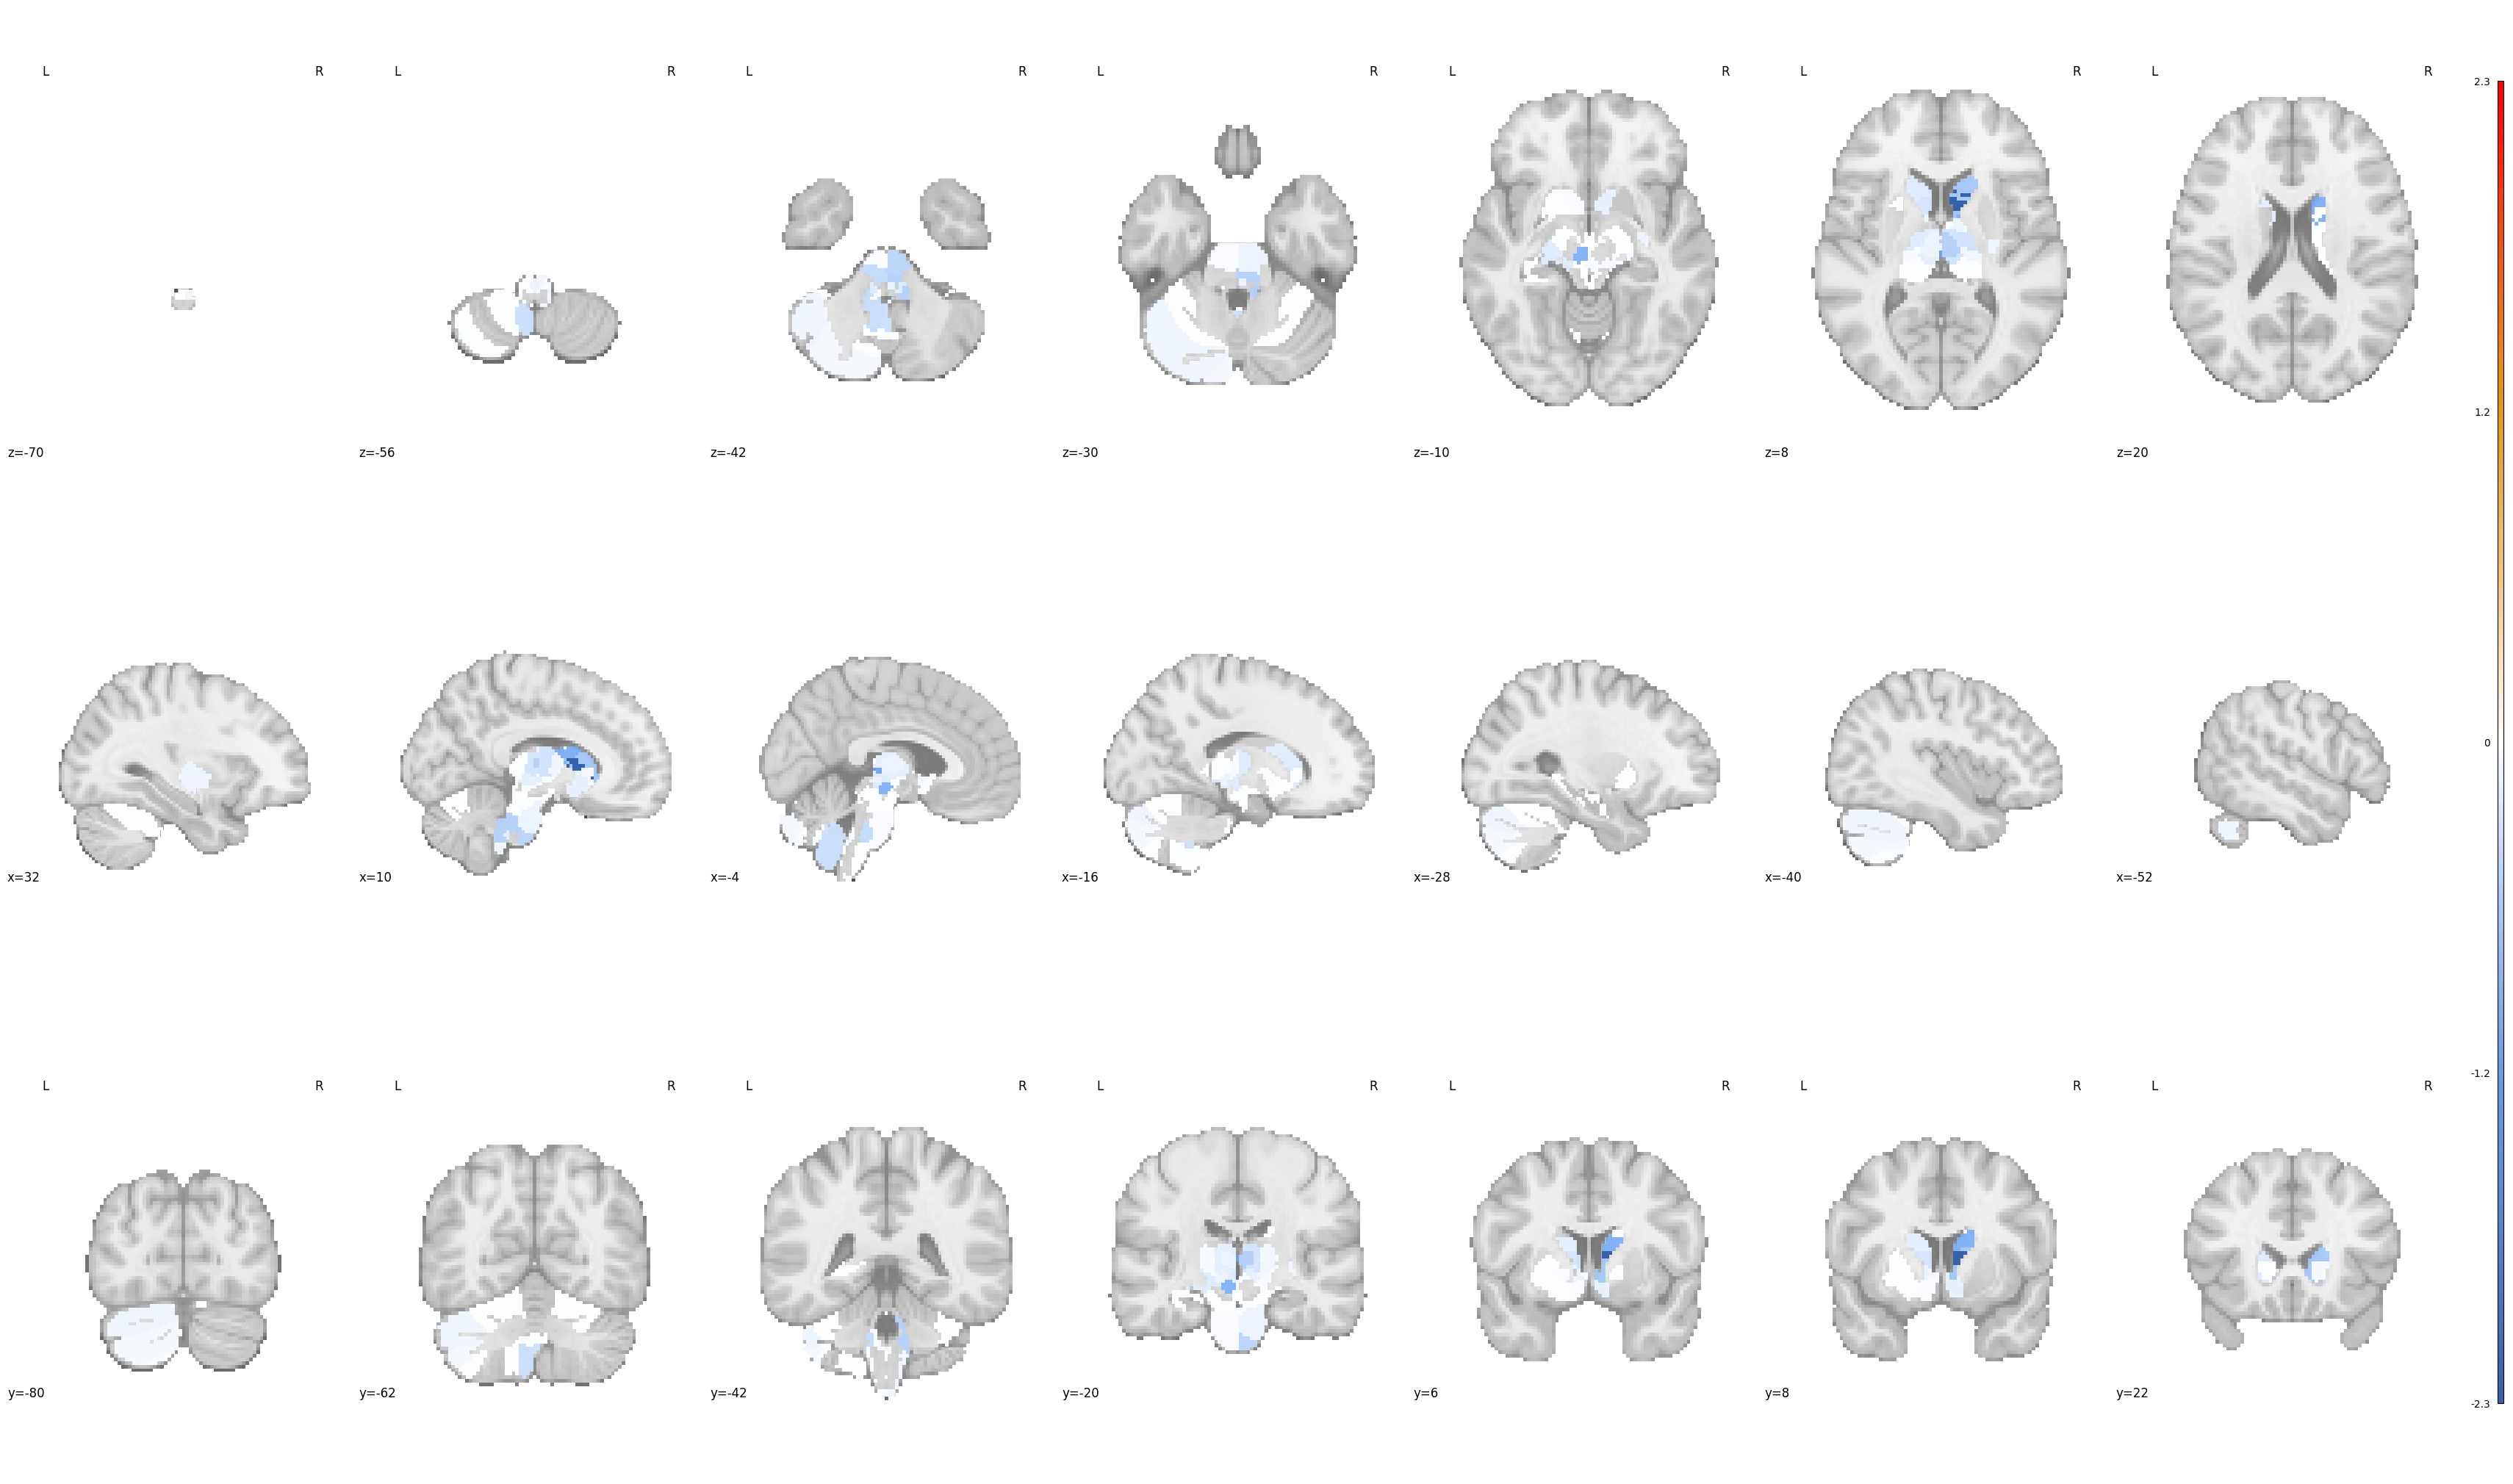

In [51]:
pain_mni = plotting.plot_stat_map(parc.inverse_transform(parcelarray[0]), display_mode='mosaic', cmap=cmap)
print(f"min: {np.min(parcelarray[0]).round(2)} max: {np.max(parcelarray[0]).round(2)}")

min: -0.2 max: 2.59


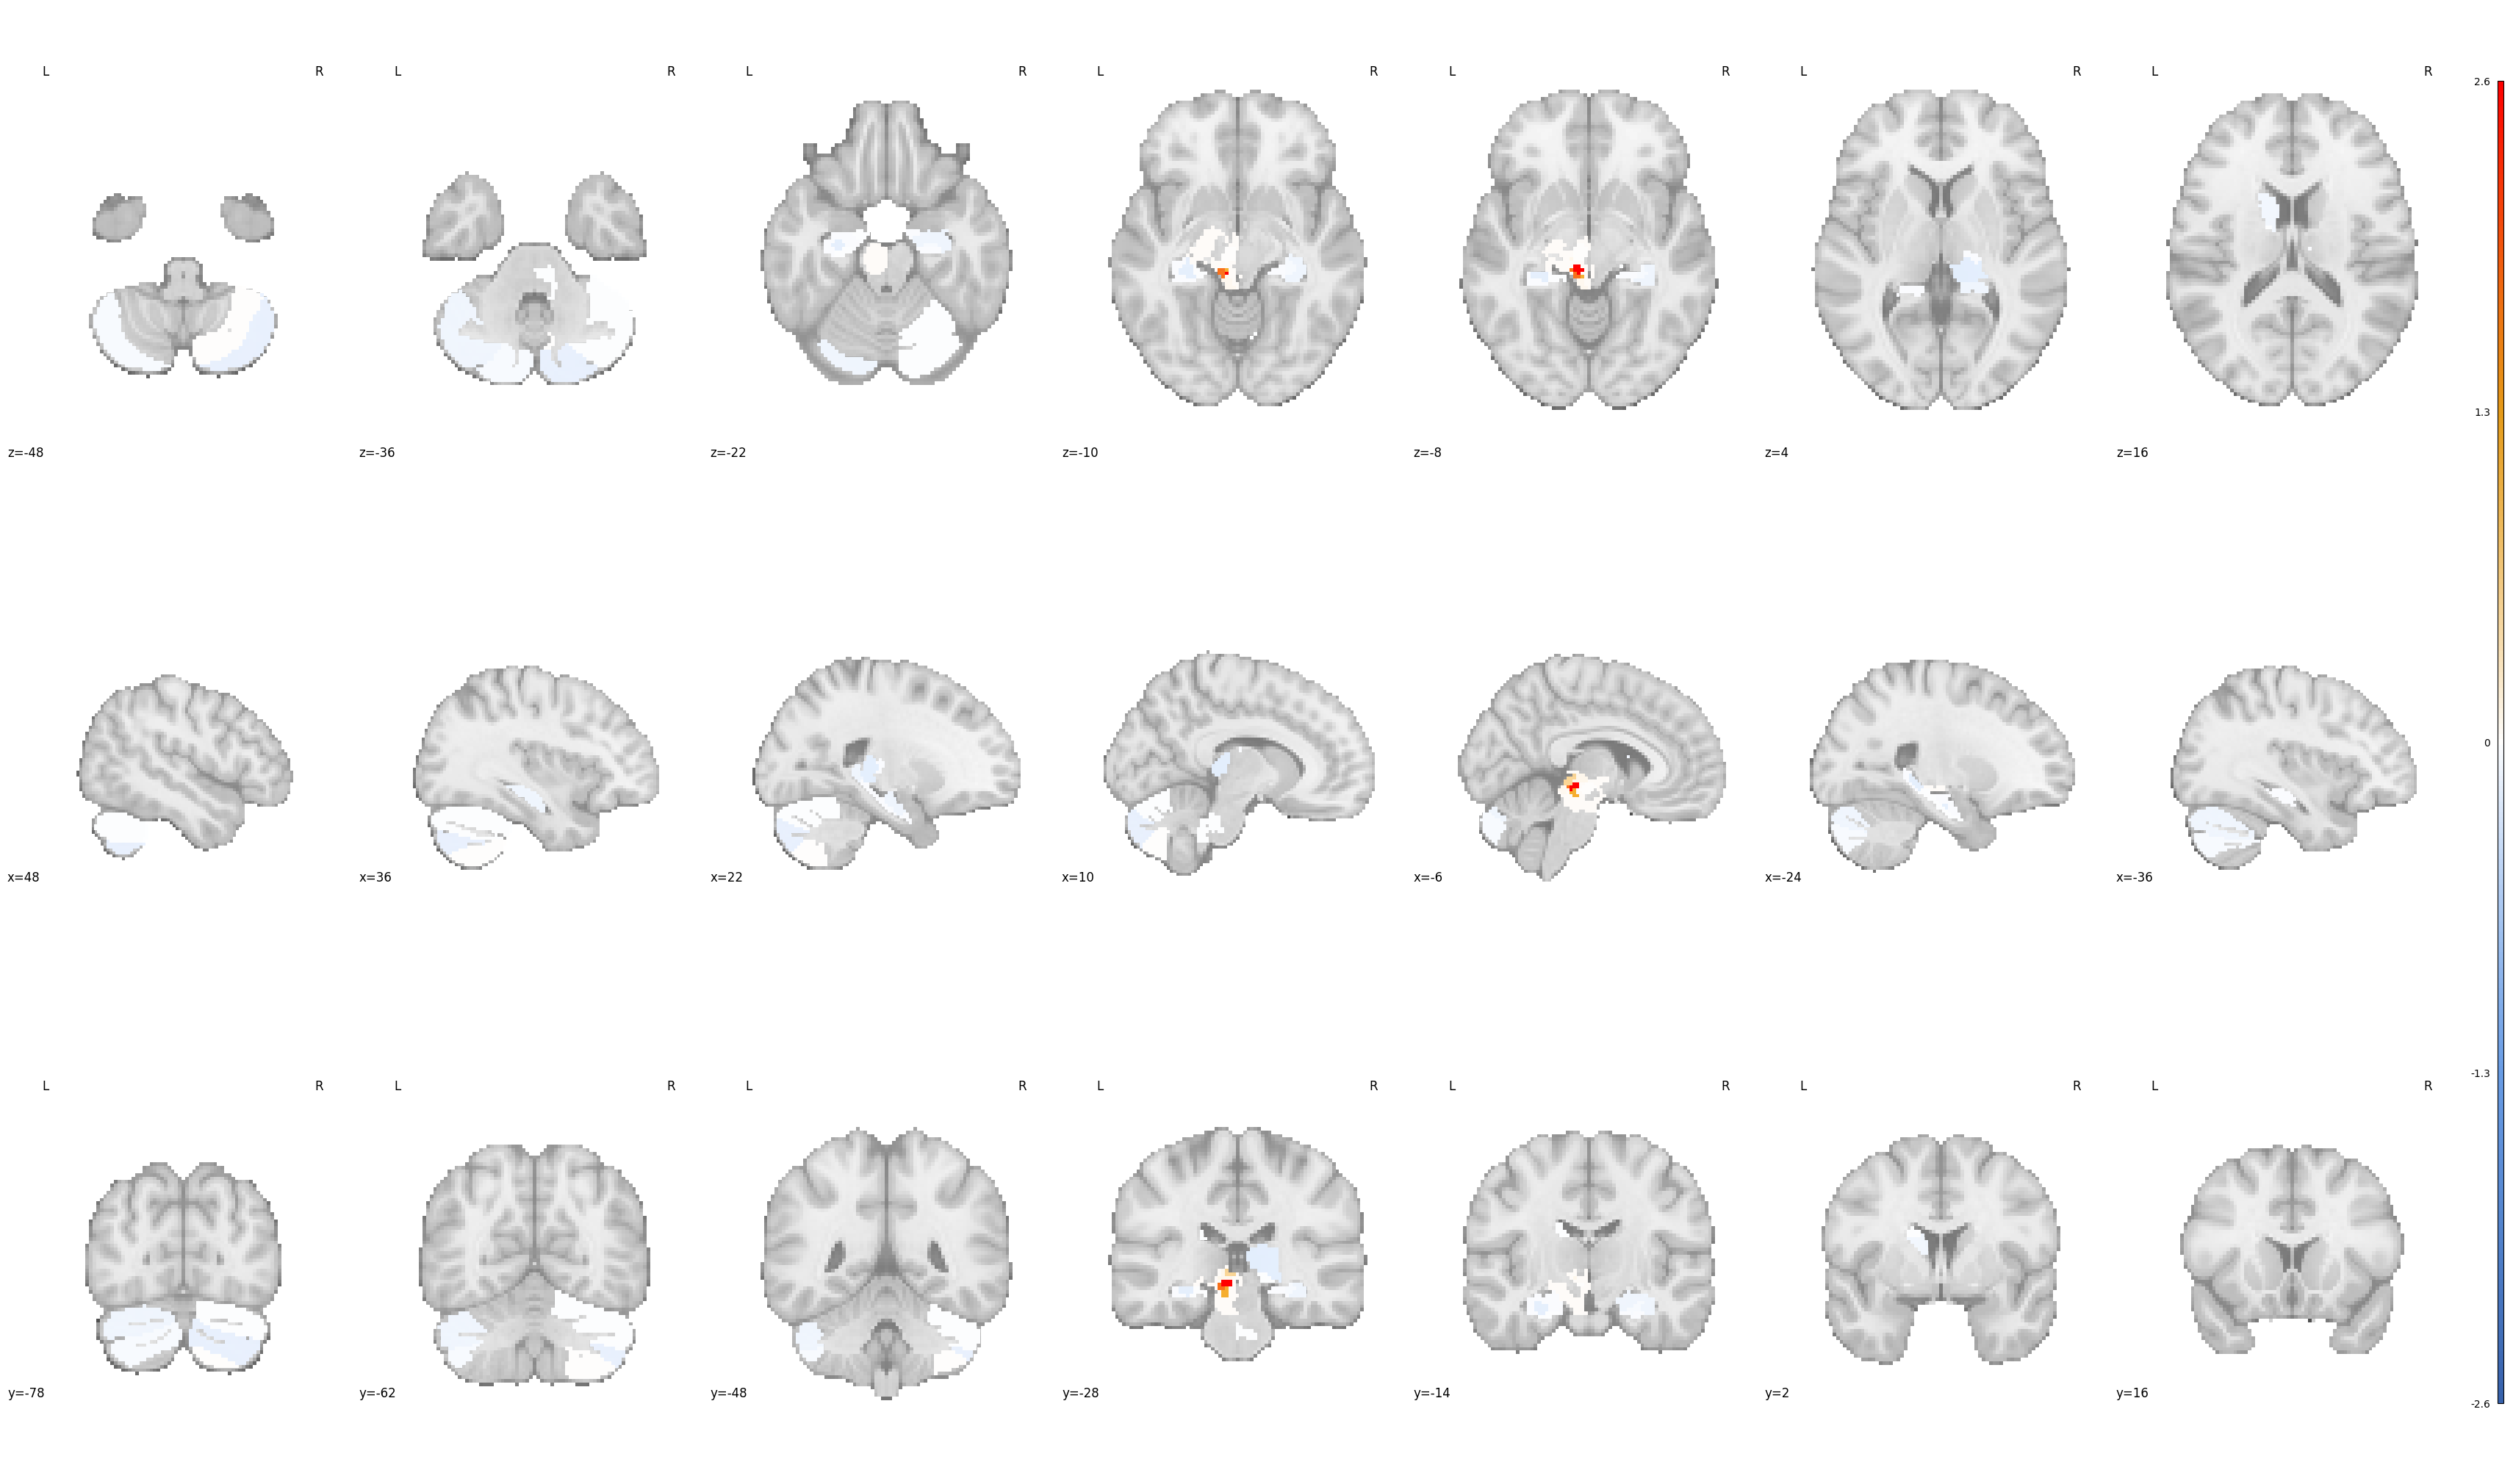

In [47]:
vic_mni = plotting.plot_stat_map(parc.inverse_transform(parcelarray[1]), display_mode='mosaic', cmap=cmap)
print(f"min: {np.min(parcelarray[1]).round(2)} max: {np.max(parcelarray[1]).round(2)}")

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


min: 0.0 max: 0.0


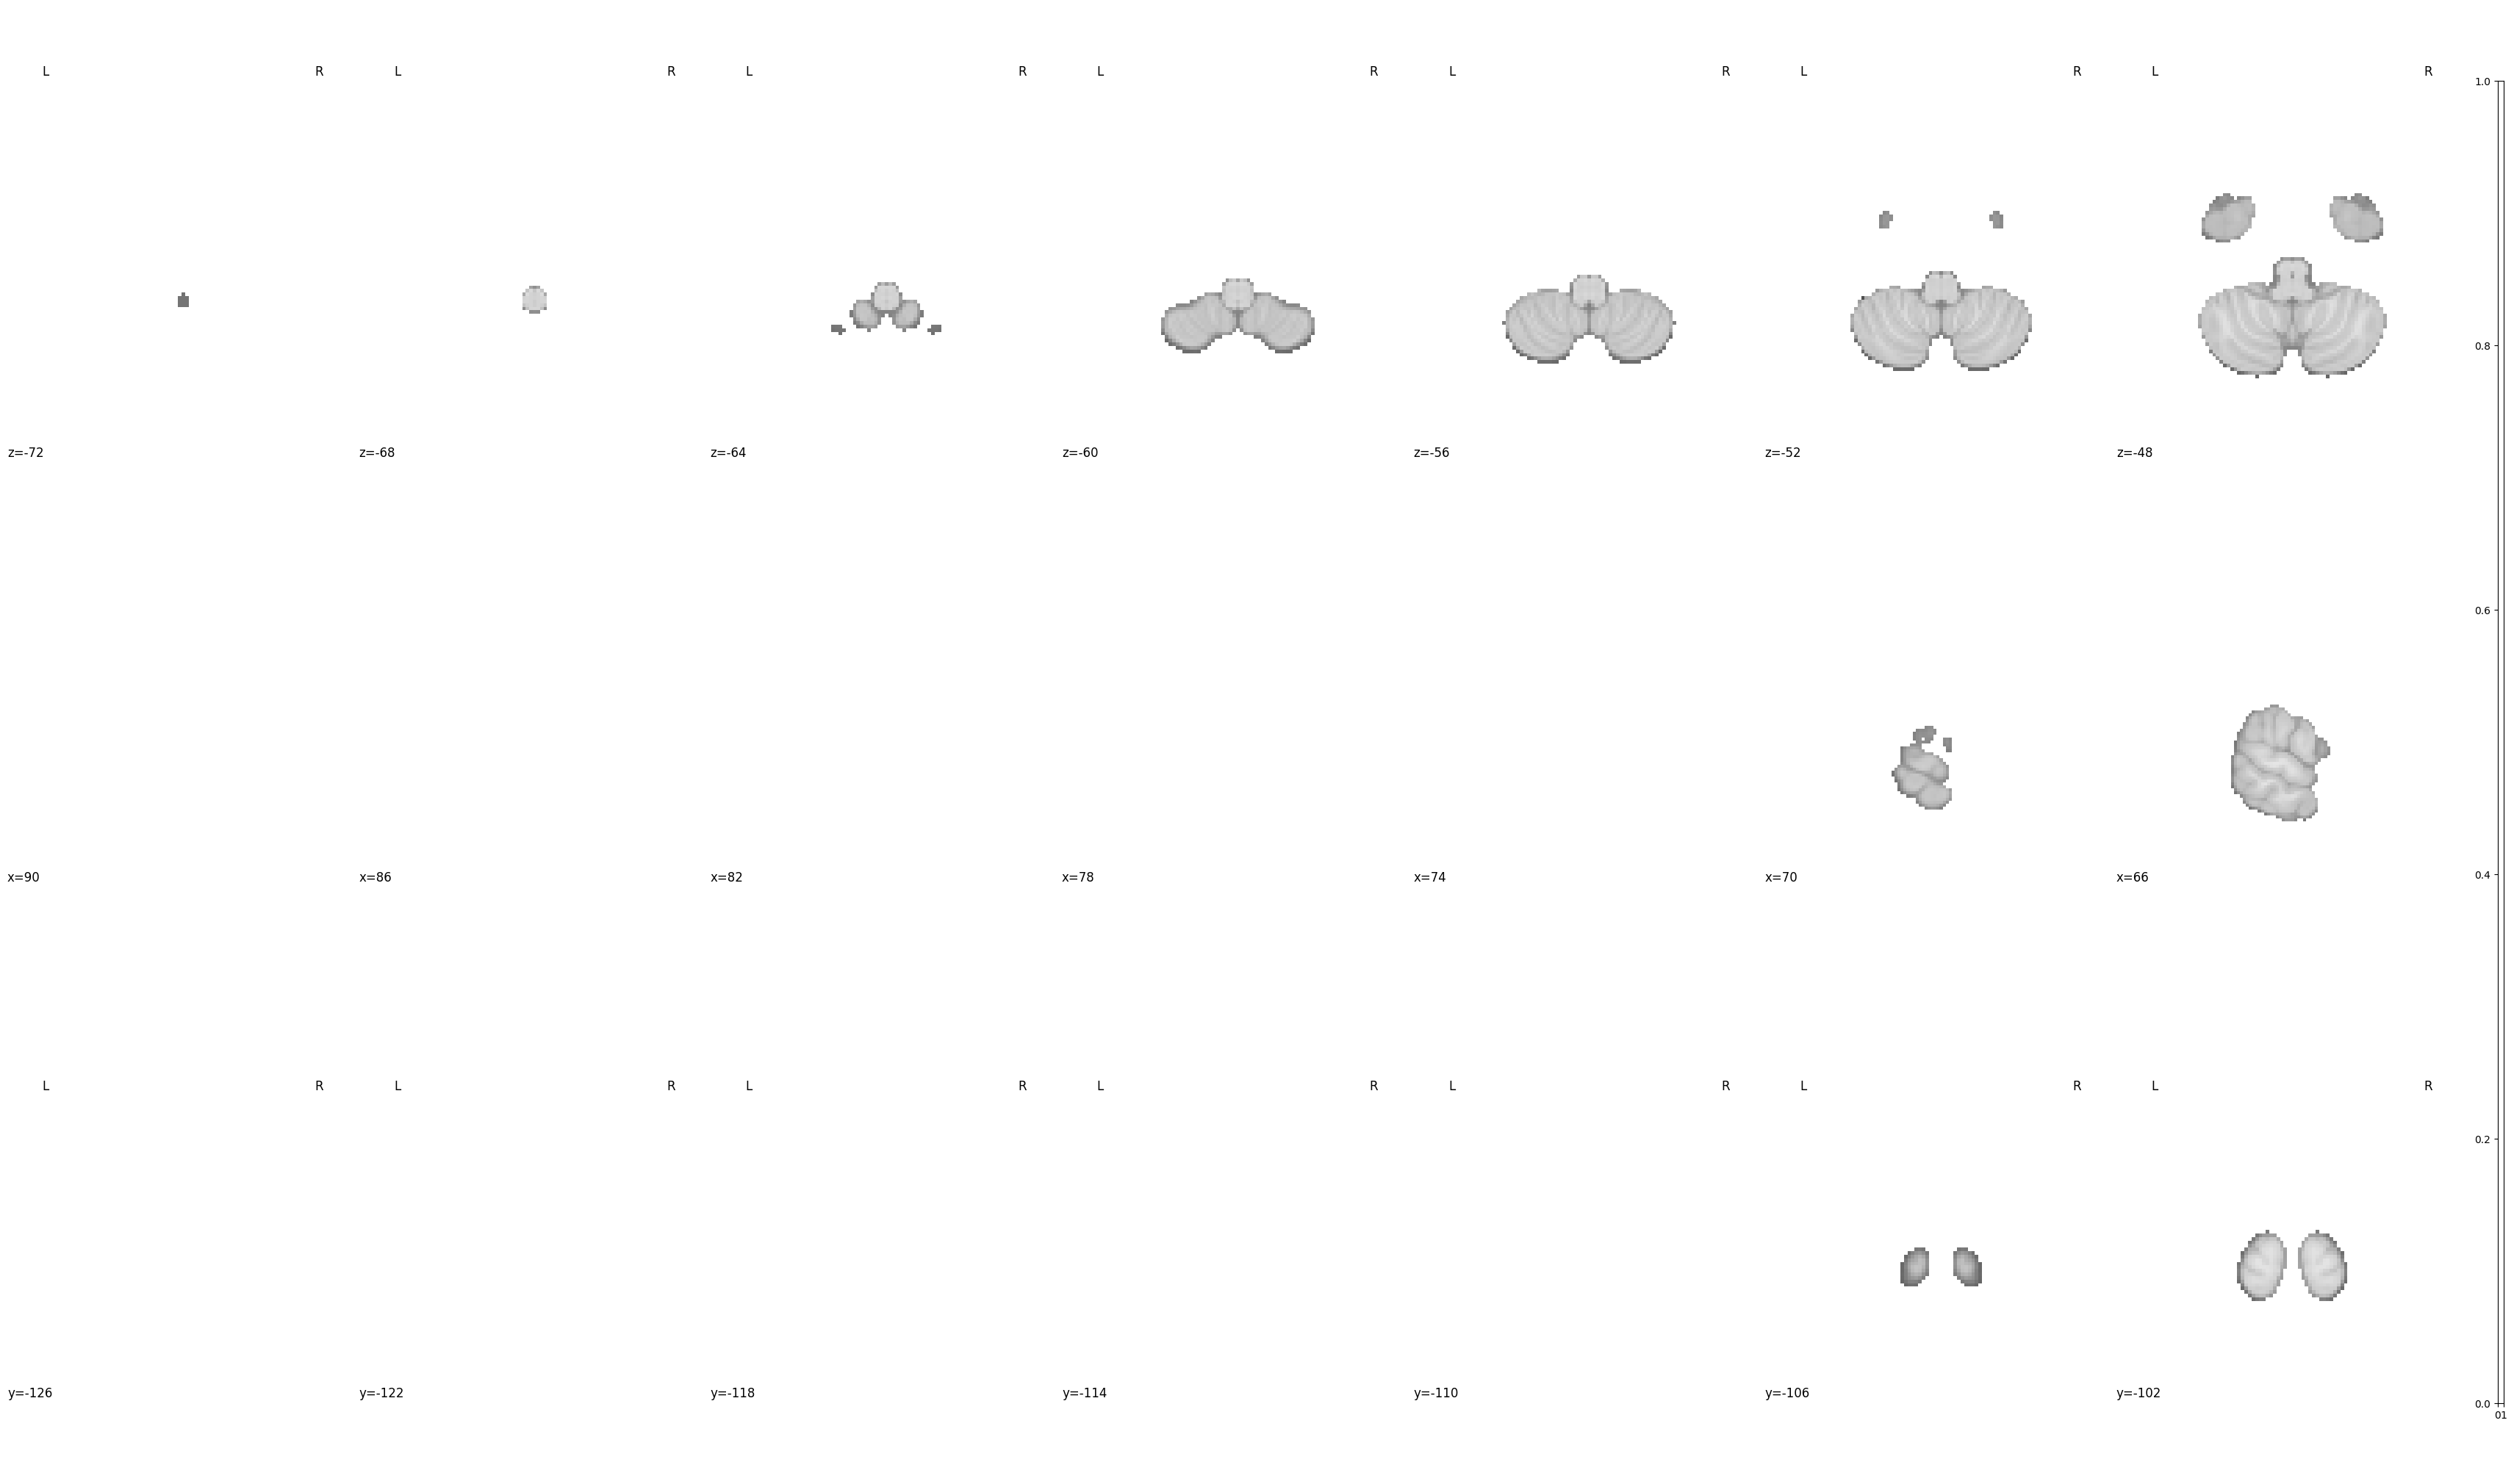

In [48]:
cog_mni = plotting.plot_stat_map(parc.inverse_transform(parcelarray[2]), display_mode='mosaic', cmap=cmap)
print(f"min: {np.min(parcelarray[2]).round(2)} max: {np.max(parcelarray[2]).round(2)}")

## surface plot with glasser

In [21]:
from neuromaps import transforms
from neuromaps.images import annot_to_gifti
hcplh = annot_to_gifti('/Users/h/Documents/projects_local/cue_expectancy/data/atlas/lh.HCP-MMP1.annot')
hcprh = annot_to_gifti('/Users/h/Documents/projects_local/cue_expectancy/data/atlas/rh.HCP-MMP1.annot')
HCP_fslr_lh = transforms.fsaverage_to_fslr(hcplh, hemi='L', target_density='32k', method='nearest')
HCP_fslr_rh = transforms.fsaverage_to_fslr(hcprh, hemi='R', target_density='32k', method='nearest')
HCP_fslr_rh_update = HCP_fslr_rh
HCP_fslr_rh_update[0].darrays[0].data = np.where(HCP_fslr_rh[0].agg_data() != 0, HCP_fslr_rh[0].agg_data() + 180, HCP_fslr_rh[0].agg_data())
hcp_glasser = (HCP_fslr_lh[0], HCP_fslr_rh_update[0])

# hcpmni = transforms.fslr_to_mni152_to_fslr(hcp_glasser, )
HCPparc = Parcellater(hcp_glasser, 'fsLR', resampling_target='parcellation')

In [22]:
parcelarray[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

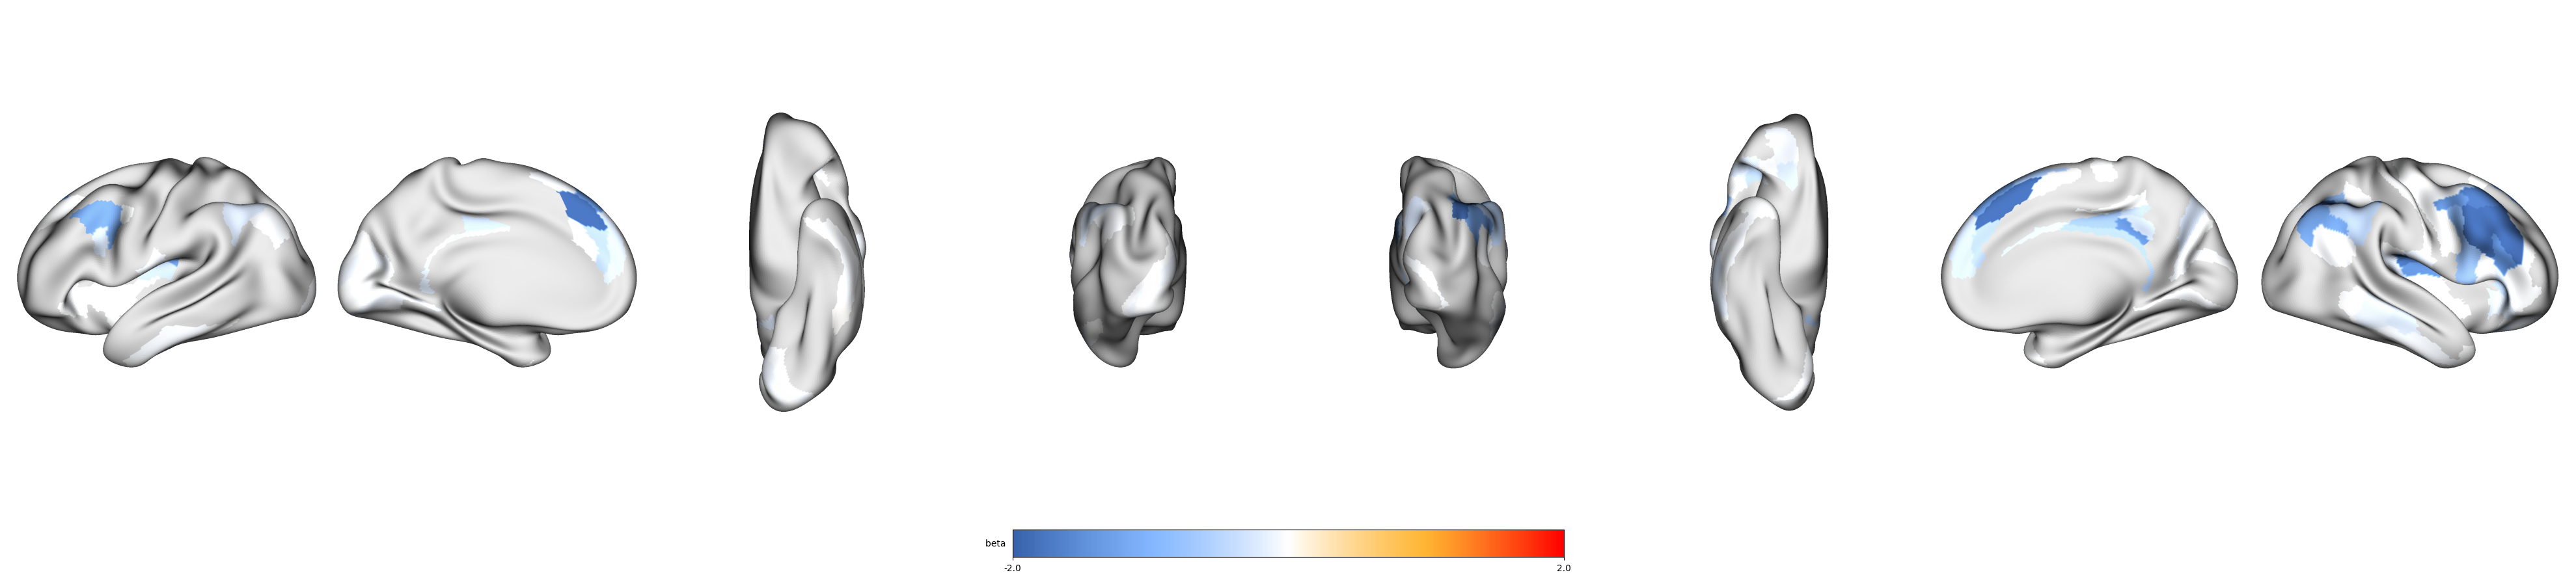

In [53]:

pain_fslr = transforms.mni152_to_fslr(
        pain_fname, fslr_density='32k', method='linear')

pain_parc = HCPparc.fit_transform(pain_fslr, 'fsLR')
glasser_pain = HCPparc.inverse_transform(pain_parc)

fig = plot_brain_surfaces(image=glasser_pain, cbar_label=f'beta ', cmap=cmap, color_range=(-2, 2))

plt.show()

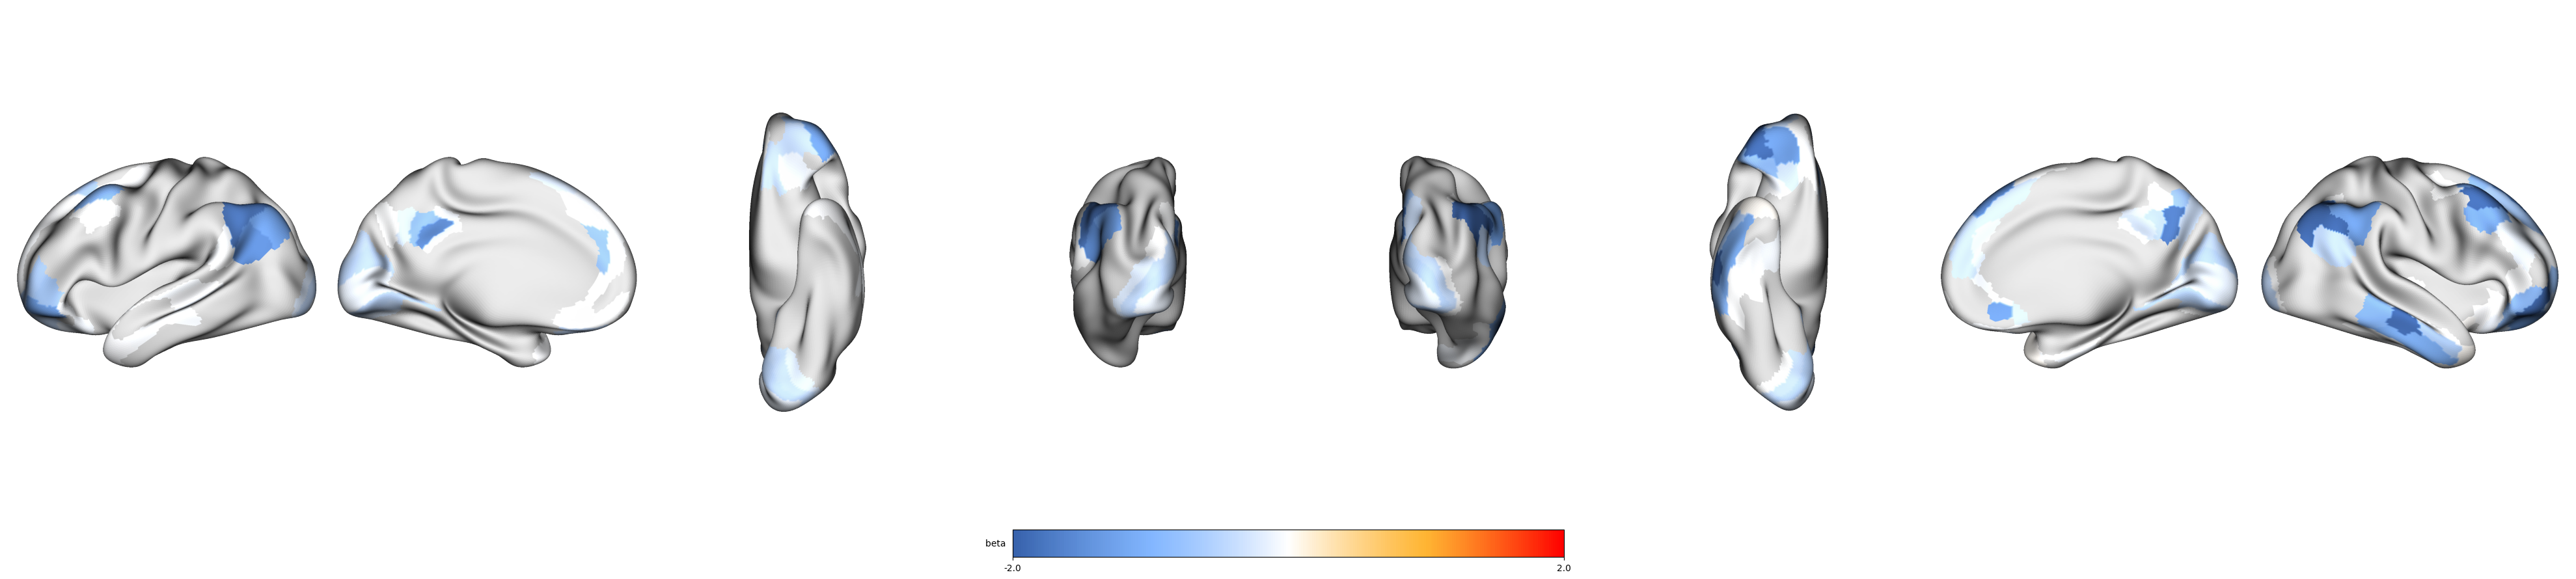

In [54]:

vic_fslr = transforms.mni152_to_fslr(
        vic_fname, fslr_density='32k', method='linear')

vic_parc = HCPparc.fit_transform(vic_fslr, 'fsLR')
glasser_vic = HCPparc.inverse_transform(vic_parc)

fig = plot_brain_surfaces(image=glasser_vic, cbar_label=f'beta ', cmap=cmap, color_range=(-2, 2))#color_range[beta_ind])

plt.show()

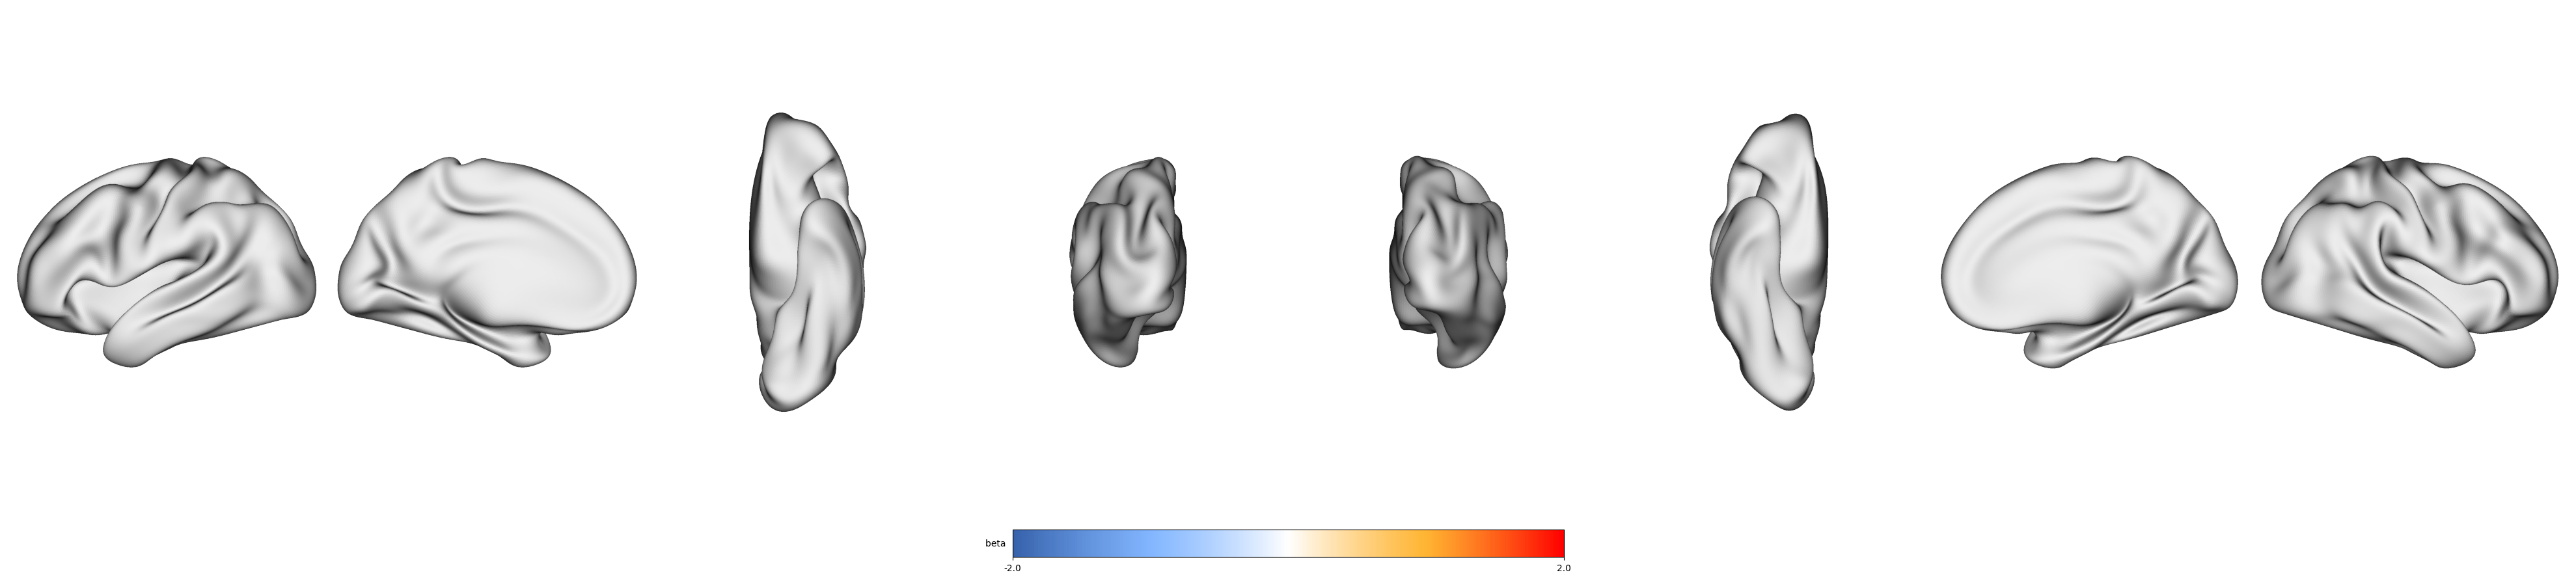

In [55]:

cog_fslr = transforms.mni152_to_fslr(
        cog_fname, fslr_density='32k', method='linear')

cog_parc = HCPparc.fit_transform(cog_fslr, 'fsLR')
glasser_cog = HCPparc.inverse_transform(cog_parc)

fig = plot_brain_surfaces(image=glasser_cog, cbar_label=f'beta ', cmap=cmap, color_range=(-2, 2))#color_range[beta_ind])

plt.show()